In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
## Loading the raw data in python

df = pd.read_csv('Events Raw Data.csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


# Data Preprocessing and EDA

In [3]:
# Check for null entries
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [4]:
# Remove rows with null entries
df.dropna(inplace = True)
print(df.shape)

(14778, 19)


In [5]:
# Remove any duplicate entries
df.drop_duplicates(inplace = True)
print(df.shape)

(14778, 19)


In [6]:
# investigate elements per feature

for cols in df.columns:
    unique_vals = df[cols].unique()
    nr_unique_vals = len(unique_vals)
    if nr_unique_vals < 10:
        print("Feature ", cols, " has ", nr_unique_vals, " unique values including ", unique_vals)
    else:
        print("Feature ", cols, " has ", nr_unique_vals)


Feature  CUSTOMER  has  14778
Feature  Age  has  9  unique values including  ['40-49' '60-64' '50-59' '65 or older' '33-39' '26-32' '21-25'
 '17 or younger' '18-20']
Feature  Gender  has  2  unique values including  ['Female' 'Male']
Feature  Postcode  has  14674
Feature  District  has  225
Feature  Constituency  has  358
Feature  latitude  has  13242
Feature  longitude  has  13262
Feature  Current_Status  has  8  unique values including  ['Married with children' 'Married without children' 'Living with partner'
 'Divorced' 'Single, never married' 'Separated' 'Widowed' 'Step parent']
Feature  Total_Household_Income  has  8  unique values including  ['50,000 to 74,999' '35,000 to 49,999' '75,000 to 99,999'
 '100,000 to 149,999' '150,000 to 199,999' '200,000 or more'
 '20,000 to 34,999' 'Less than 20,000']
Feature  How often you attend Entertaining events in a year?  has  5  unique values including  ['4 Times a Year' '3 Times a Year' '1 Times a Year' '2 Times a Year'
 '5+ Times a Year']
F

In [7]:
df.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [8]:
df.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


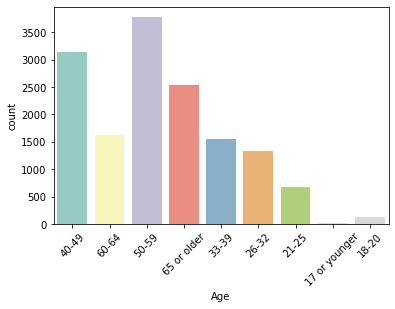

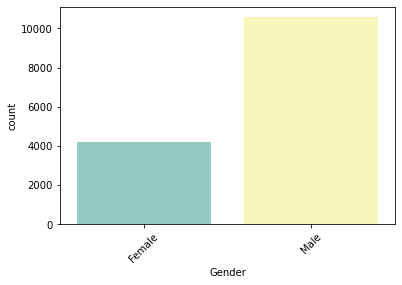

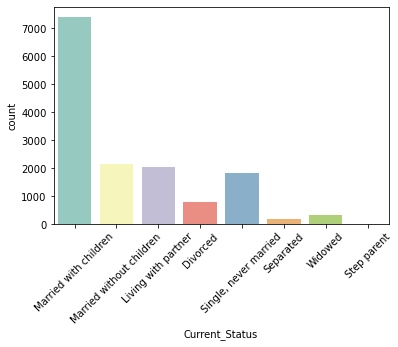

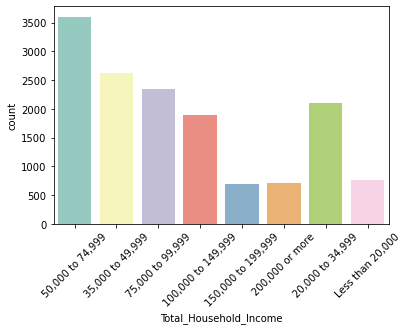

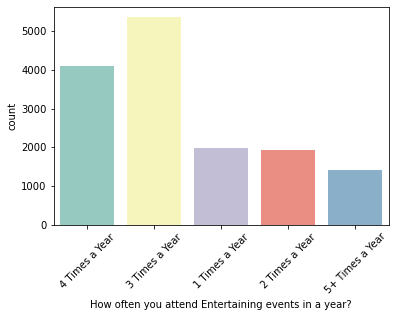

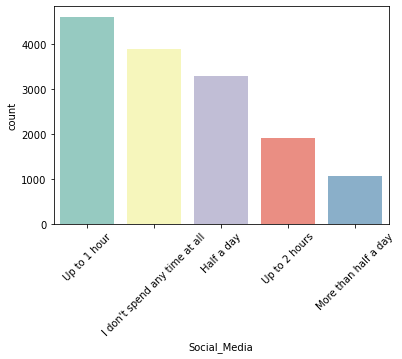

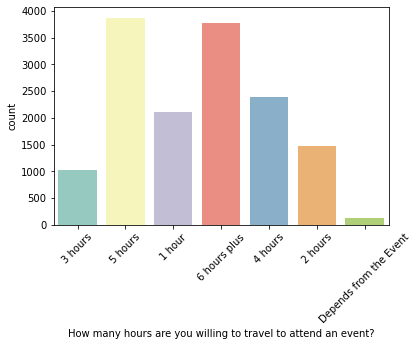

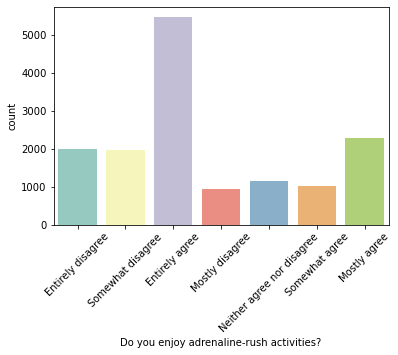

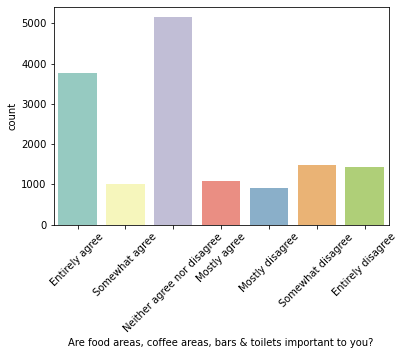

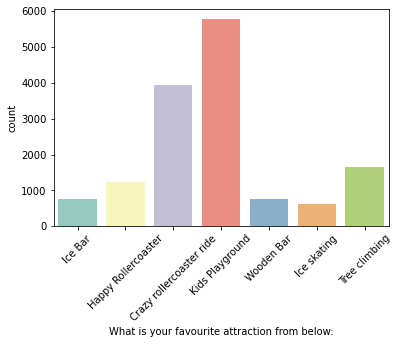

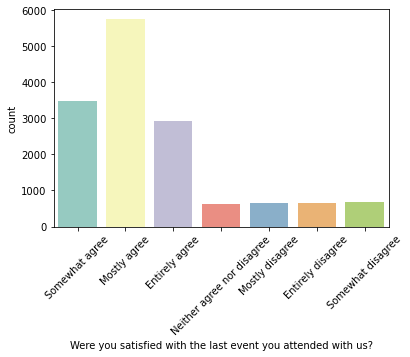

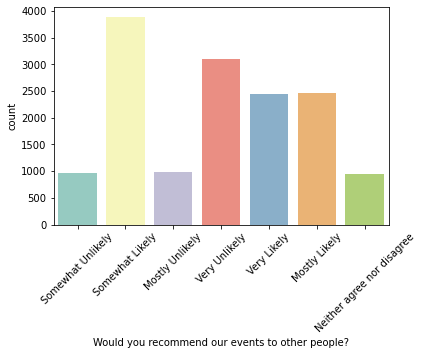

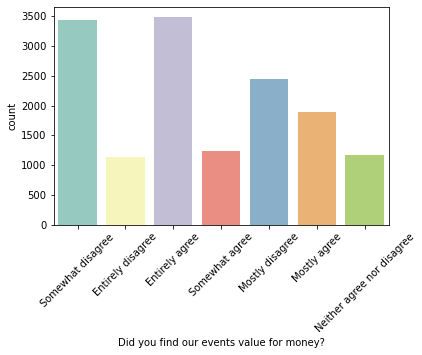

In [9]:
# Looping through all the categorical features by our y variable - see if there is relationship

features = ['Age', 'Gender', 
       'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
# giving a numeric representation to categorical variables
print(df.shape)
raw_data = df[features]
print(raw_data.shape)
# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(14778, 19)
(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [11]:
raw_data.head()

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


# Feature Scaling

In [12]:
#Let's check if any feature requires scaling
scale_vars = []
for f in new_raw_data.columns:
    if new_raw_data[f].max() > 1:
        scale_vars.append(f)
scale_vars

[]

# KMeans

In [13]:
# We will start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(new_raw_data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)


# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [3 3 3 ... 3 1 3]
The Inertia is:  100865.1789273626


In [14]:
kmeans.labels_.shape

(14778,)

In [15]:
kmeans.cluster_centers_

array([[-2.27682456e-18,  1.82186235e-02,  1.24493927e-01,
         1.97368421e-01,  1.07287449e-01,  1.29554656e-01,
         1.81174089e-01,  8.40080972e-02,  1.57894737e-01,
         3.02631579e-01,  6.97368421e-01,  1.34615385e-01,
         2.26720648e-01, -1.22124533e-15,  1.95344130e-01,
         3.03643725e-02,  3.54251012e-01,  2.02429150e-03,
         5.66801619e-02,  2.02429150e-03,  3.03643725e-03,
         4.30161943e-01,  2.28983499e-16,  5.64777328e-01,
         1.11022302e-16,  7.49400542e-16,  3.40005801e-16,
        -4.99600361e-16,  9.98987854e-01,  1.01214575e-03,
         3.33066907e-16, -3.46944695e-16,  3.05311332e-16,
         2.02429150e-03,  9.94939271e-01,  2.02429150e-03,
         1.01214575e-03,  2.02429150e-03,  9.83805668e-01,
         3.33066907e-16,  3.03643725e-03,  5.06072874e-03,
         5.06072874e-03,  1.01214575e-03,  5.63765182e-01,
         2.22044605e-16,  4.36234818e-01,  1.94289029e-16,
         1.80411242e-16, -2.22044605e-16, -2.77555756e-1

# What is Inertia?

Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. 

In [16]:
# How to find the best number of Ks? (Elbow Method)

# Running K means with multiple Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9, .... 19]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(new_raw_data)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 125619.02972065964
The inertia for : 3 Clusters is: 114905.39784583467
The inertia for : 4 Clusters is: 106337.18007454128
The inertia for : 5 Clusters is: 100865.1789273626
The inertia for : 6 Clusters is: 96432.68621313221
The inertia for : 7 Clusters is: 93814.49649581587
The inertia for : 8 Clusters is: 91864.70809764387
The inertia for : 9 Clusters is: 89725.57903775302
The inertia for : 10 Clusters is: 88540.69184845858
The inertia for : 11 Clusters is: 87662.6673397905
The inertia for : 12 Clusters is: 86632.59301274843
The inertia for : 13 Clusters is: 85755.03117123523
The inertia for : 14 Clusters is: 85026.48115685378
The inertia for : 15 Clusters is: 84355.95041422671
The inertia for : 16 Clusters is: 83688.67739466966
The inertia for : 17 Clusters is: 82952.6898529621
The inertia for : 18 Clusters is: 82284.27523573027
The inertia for : 19 Clusters is: 81797.65052685676


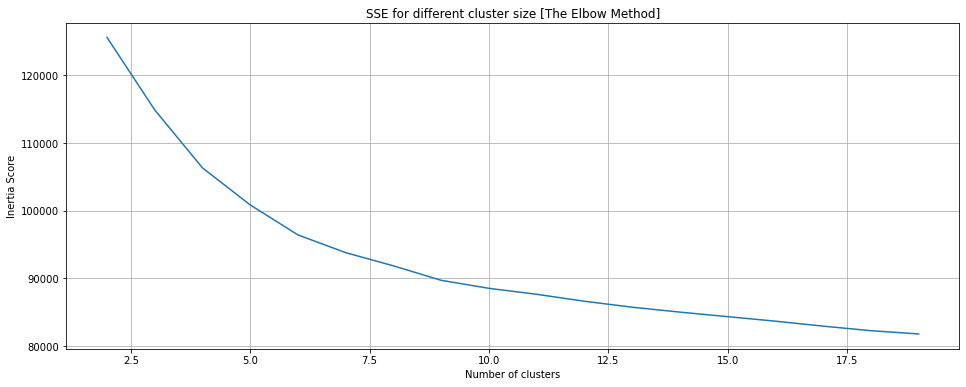

In [17]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('SSE for different cluster size [The Elbow Method]')
plt.plot(no_of_clusters, inertia)
plt.grid(True)
plt.show()

# Clustering Validation Technique (Silhouette)

https://en.wikipedia.org/wiki/Silhouette_(clustering)

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

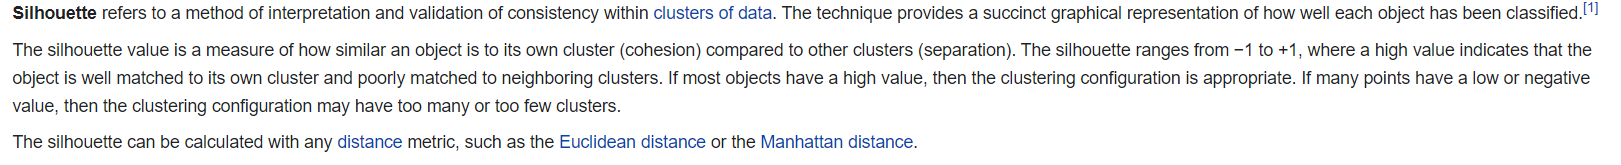

In [18]:
from IPython.display import Image
Image(filename = 'purpose-of-silhouette.png')

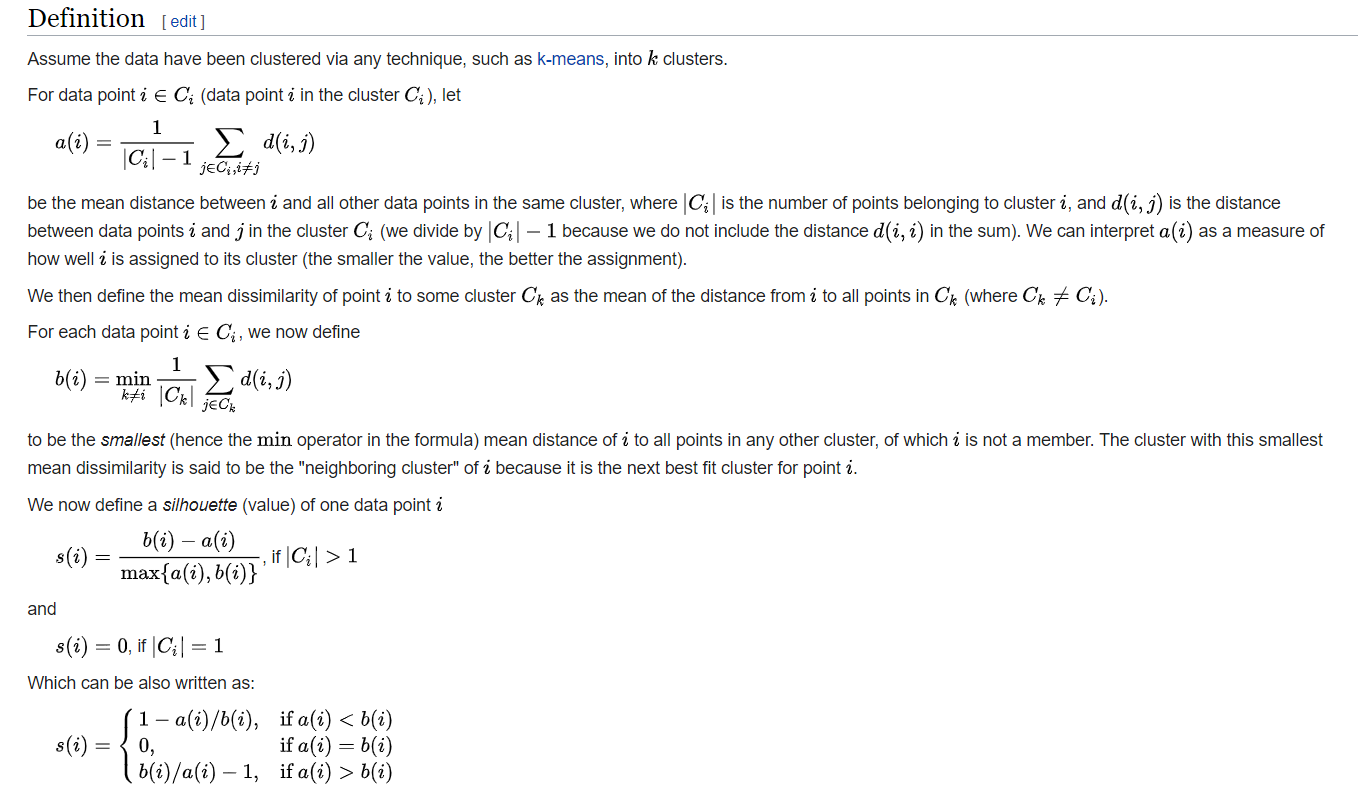

In [19]:
Image(filename='Silhouette-clustering.png') 

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
avg_silh = []
for n_clusters in no_of_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=540)
    cluster_labels = clusterer.fit_predict(new_raw_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(new_raw_data, cluster_labels)
    avg_silh.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

   
    
    
    

For n_clusters = 2 The average silhouette_score is : 0.13992456890913335
For n_clusters = 3 The average silhouette_score is : 0.12324576035751086
For n_clusters = 4 The average silhouette_score is : 0.14315521909290532
For n_clusters = 5 The average silhouette_score is : 0.15391684972449343
For n_clusters = 6 The average silhouette_score is : 0.16516561674619268
For n_clusters = 7 The average silhouette_score is : 0.14540157050849345
For n_clusters = 8 The average silhouette_score is : 0.1476426951549887
For n_clusters = 9 The average silhouette_score is : 0.15479088794023727
For n_clusters = 10 The average silhouette_score is : 0.15613475214857367
For n_clusters = 11 The average silhouette_score is : 0.1256650017424242
For n_clusters = 12 The average silhouette_score is : 0.12583695890812968
For n_clusters = 13 The average silhouette_score is : 0.12734720267355448
For n_clusters = 14 The average silhouette_score is : 0.1288367858200692
For n_clusters = 15 The average silhouette_score 

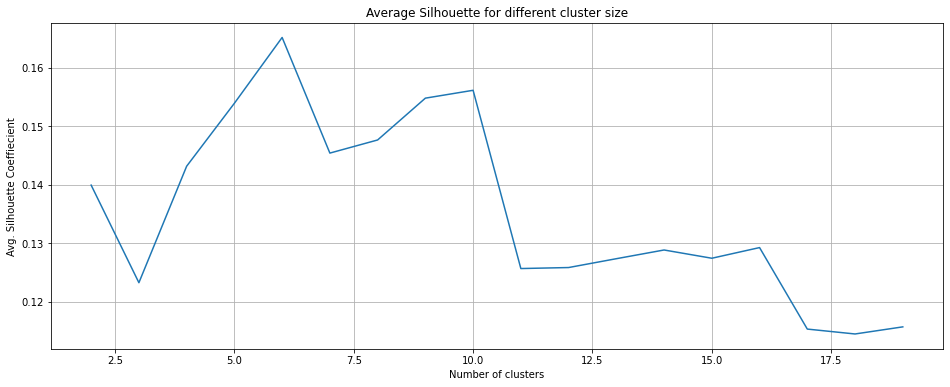

In [21]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Silhouette Coeffiecient')
plt.title('Average Silhouette for different cluster size')
plt.plot(no_of_clusters, avg_silh)
plt.grid()
plt.show()

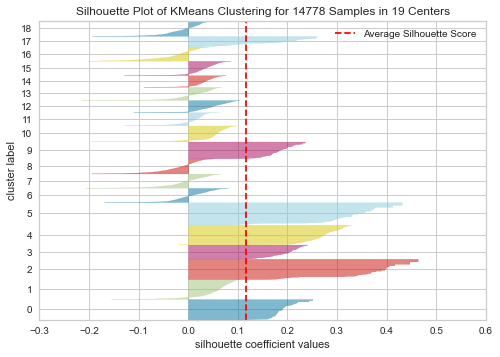

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
visualizer.fit(new_raw_data)
visualizer.show();

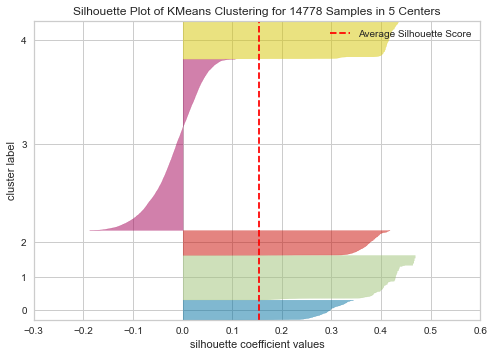

In [23]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(5, random_state=540), new_raw_data, colors='yellowbrick');

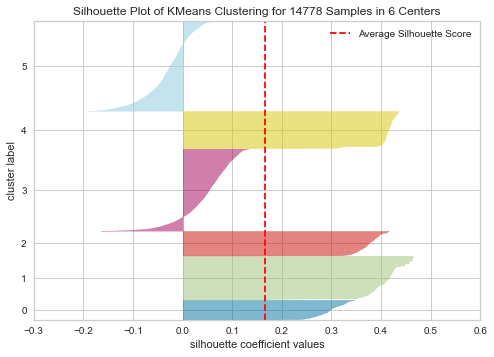

In [24]:
silhouette_visualizer(KMeans(6, random_state=540), new_raw_data, colors='yellowbrick');

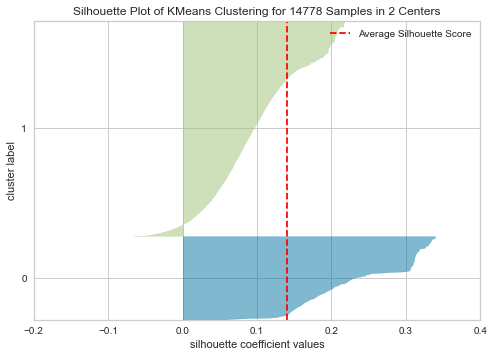

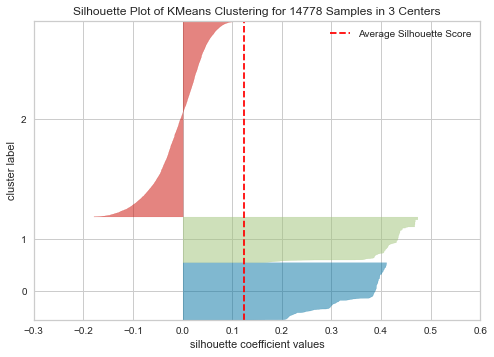

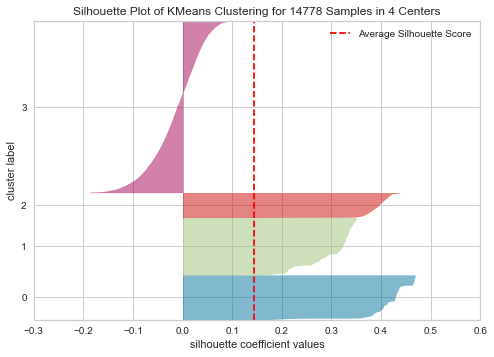

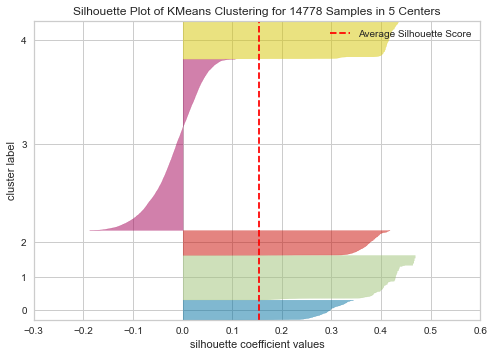

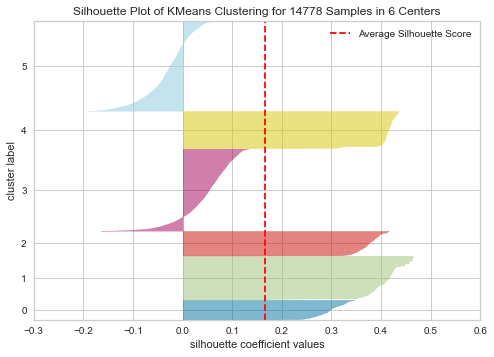

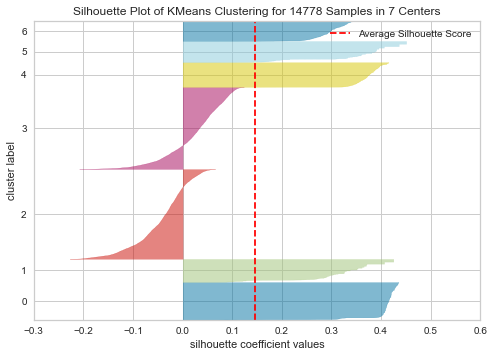

In [25]:
x = [2, 3, 4, 5, 6, 7]

for i in x:
    silhouette_visualizer(KMeans(i, random_state=540), new_raw_data, colors='yellowbrick');